In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Necessary imports
import sys
import numpy as np

sys.path.append('../..')
from seismiqb import plot_image

In [3]:
shape = (50, 50)
image = np.random.rand(*shape)

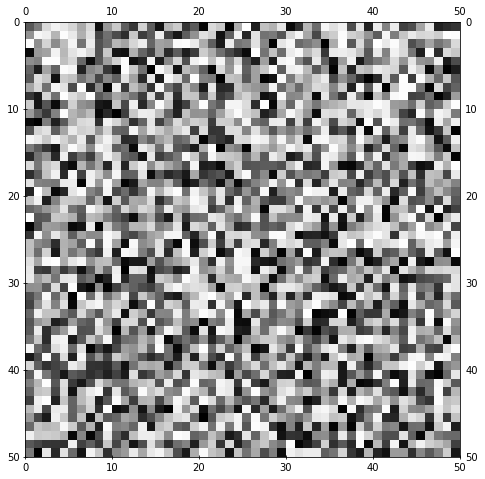

In [4]:
plot_image(image)

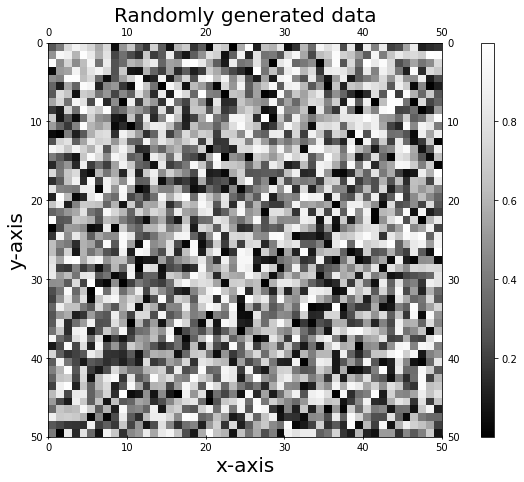

In [5]:
annotation_params = {
    'title_label': 'Randomly generated data',
    'xlabel': 'x-axis',
    'title_fontsize': 20,
    'ylabel': 'y-axis',
    'colorbar': True,
}

plot_image(image, **annotation_params)

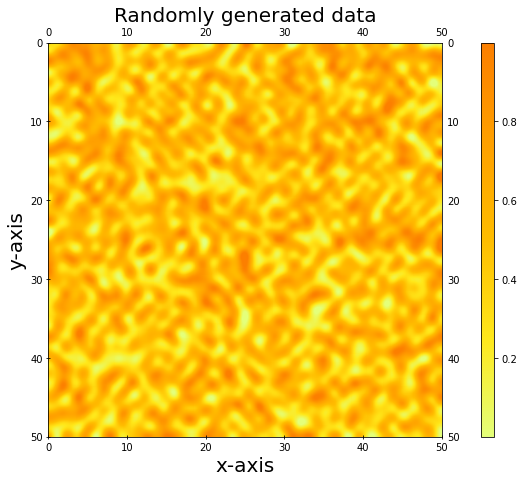

In [6]:
image_params = {
    'cmap': 'Wistia',
    'interpolation': 'bessel'
}

plot_image(image, **image_params, **annotation_params)

In [7]:
mask_0 = np.ones(shape)
mask_0[image > 0.5] = np.nan

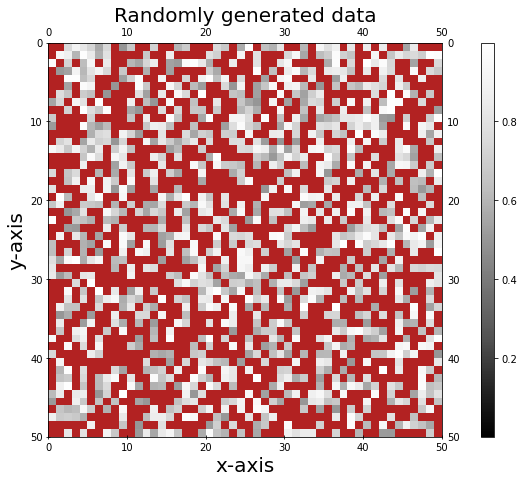

In [8]:
plot_image([image, mask_0], **annotation_params)

In [9]:
mask_1 = np.ones(shape)
mask_1[image > 0.25] = np.nan

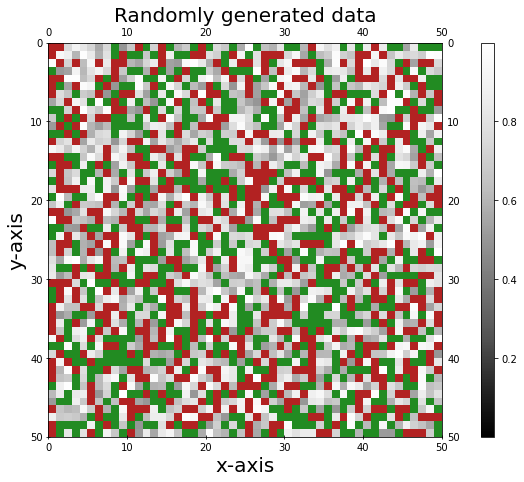

In [10]:
plot_image([image, mask_0, mask_1], **annotation_params)

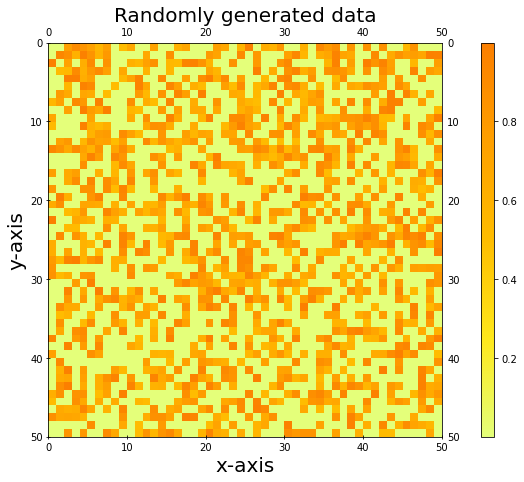

In [11]:
image_params = {
    'cmap': 'Wistia'
}

plot_image([image, mask_0, mask_1],
           **image_params,
           **annotation_params)

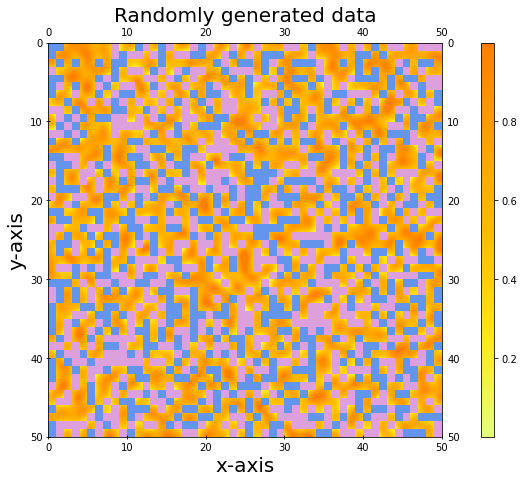

In [12]:
image_params = {
    'cmap': ['Wistia', 'cornflowerblue', 'plum'],
    'interpolation': ['bessel', None, None]
}

plot_image([image, mask_0, mask_1],
           **image_params,
           **annotation_params)

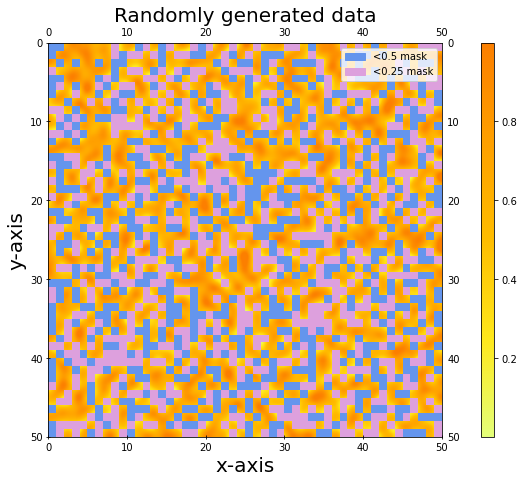

In [13]:
annotation_params['legend_label'] = ['<0.5 mask', '<0.25 mask']

plot_image([image, mask_0, mask_1],
           **image_params,
           **annotation_params)

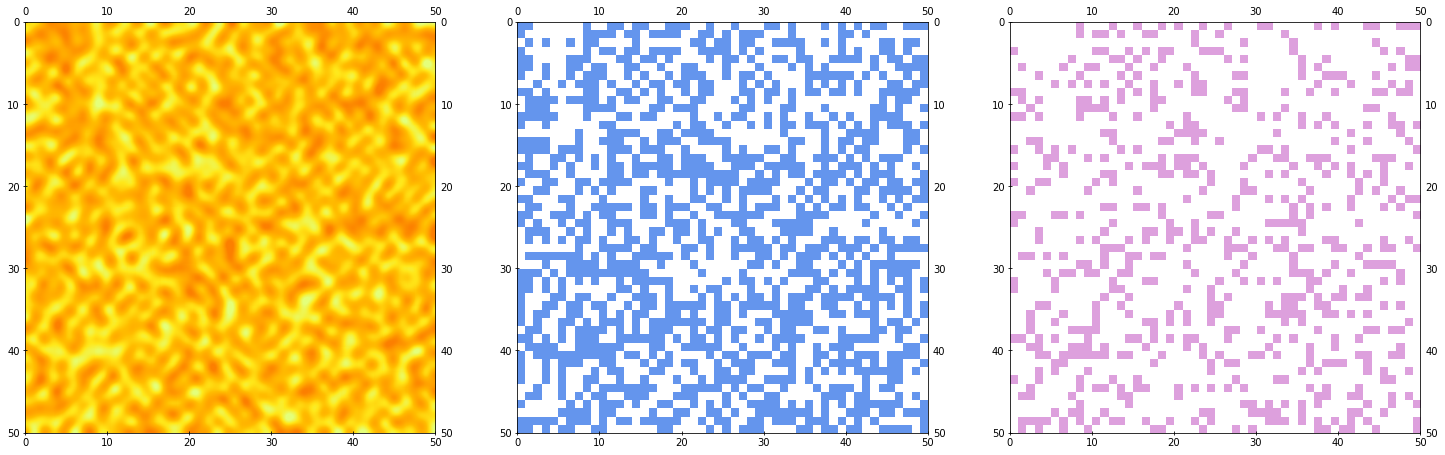

In [14]:
figure_params = {'figsize': (25, 10)}

plot_image([image, mask_0, mask_1], separate=True, **image_params, **figure_params)

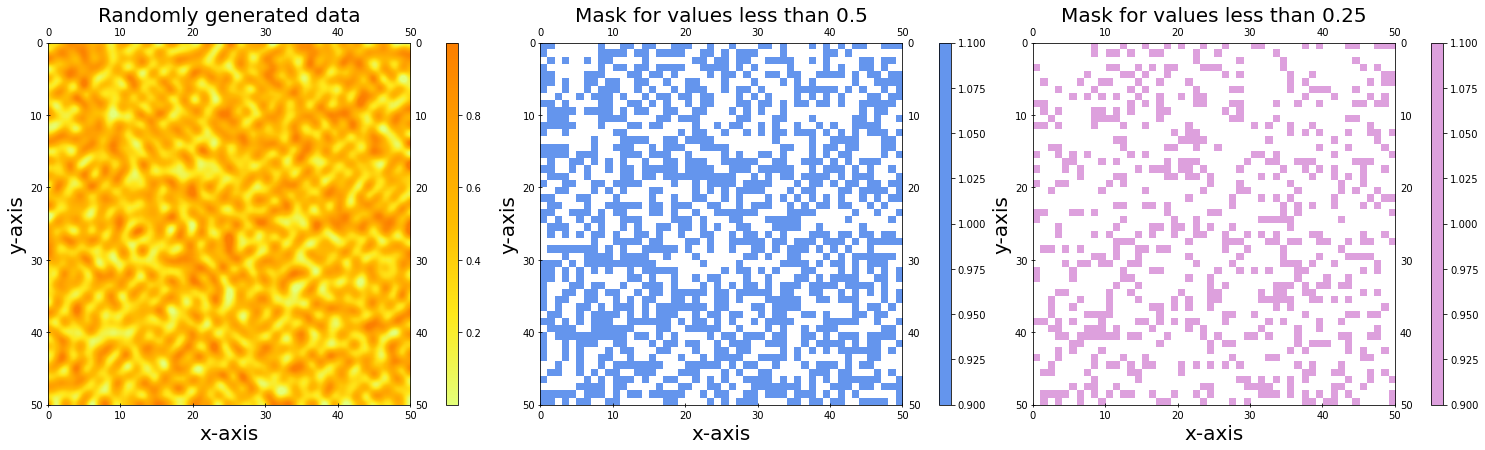

In [15]:
annotation_params['title'] = ['Randomly generated data',
                              'Mask for values less than 0.5',
                              'Mask for values less than 0.25']
annotation_params['legend_label'] = None

plot_image([image, mask_0, mask_1],
           separate=True,
           **figure_params,
           **image_params,
           **annotation_params)

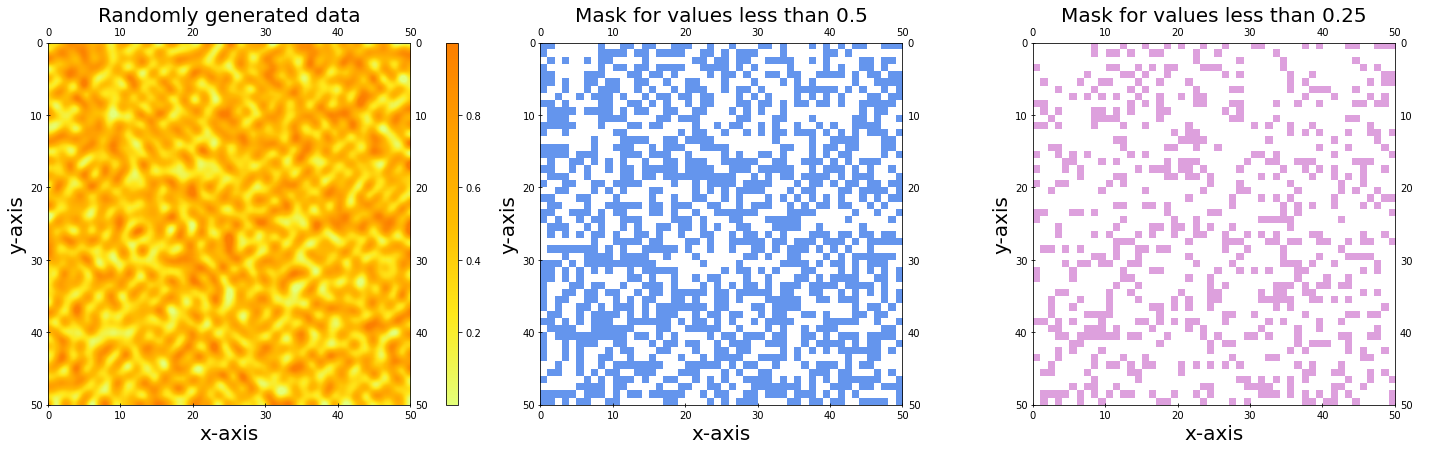

In [16]:
annotation_params['colorbar'] = [True, False, False]

plot_image([image, mask_0, mask_1],
           separate=True,
           **figure_params,
           **image_params,
           **annotation_params)

In [17]:
%pdb

Automatic pdb calling has been turned ON


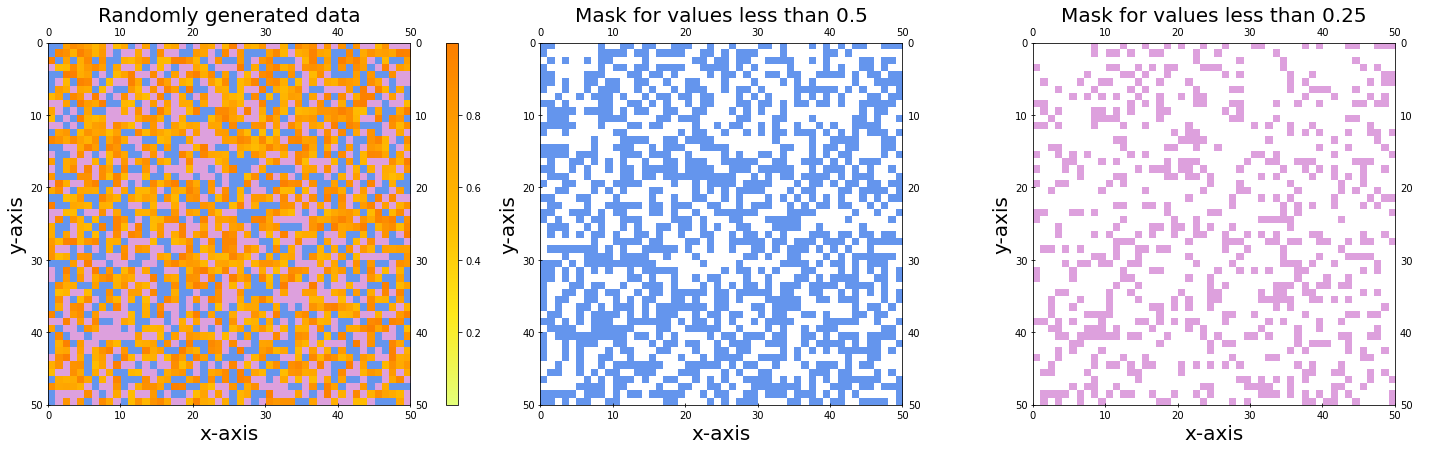

In [18]:
image_params = {'cmap' : [['Wistia', 'cornflowerblue', 'plum'], ['cornflowerblue'], ['plum']]}

plot_image([[image, mask_0, mask_1], mask_0, mask_1],
           **figure_params,
           **image_params,
           **annotation_params)

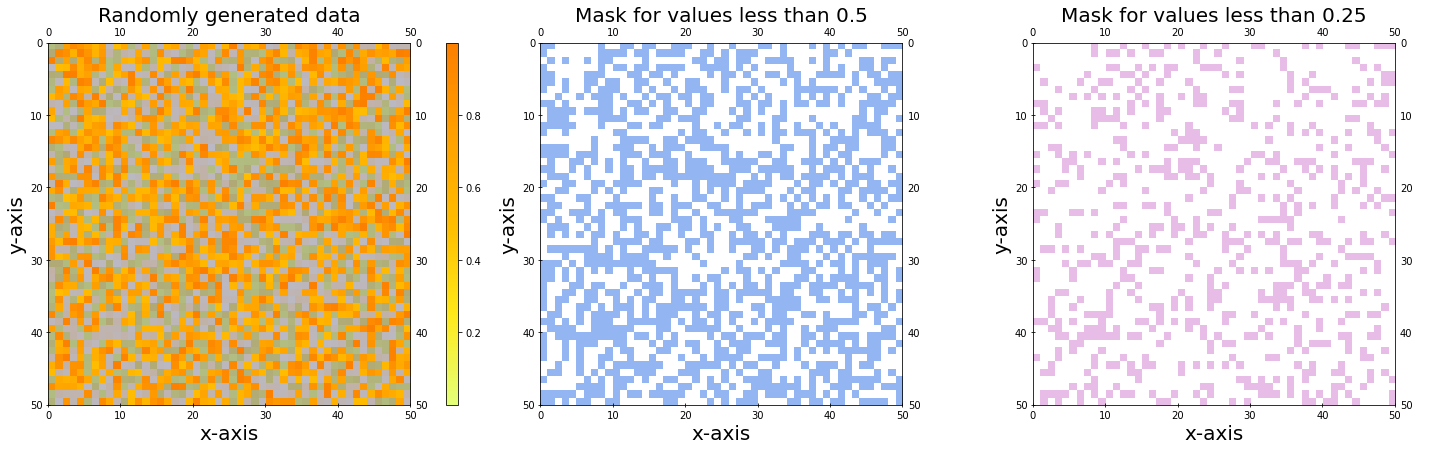

In [19]:
image_params['alpha'] = [[1., .5, .4], [.7], [.7]]

plot_image([[image, mask_0, mask_1], mask_0, mask_1],
           **figure_params,
           **image_params,
           **annotation_params)

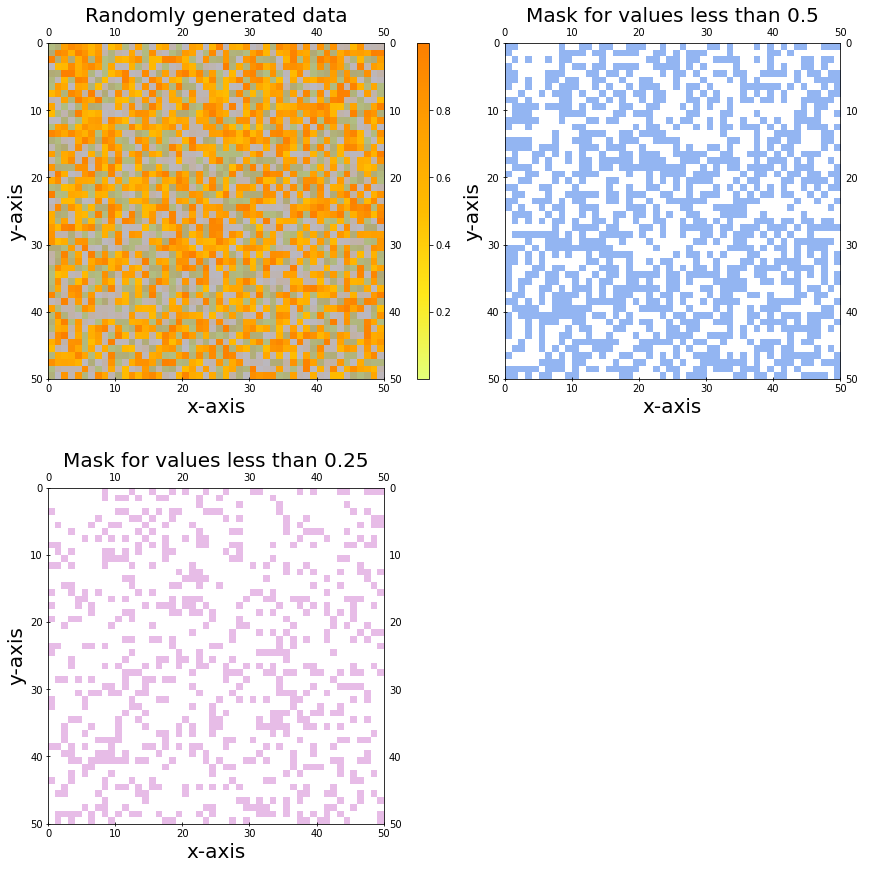

In [20]:
figure_params = {
    'ncols': 2,
    'nrows': 2,
    'figsize': (15, 15)
}

plot_image([[image, mask_0, mask_1], mask_0, mask_1],
           **figure_params,
           **image_params,
           **annotation_params)

***

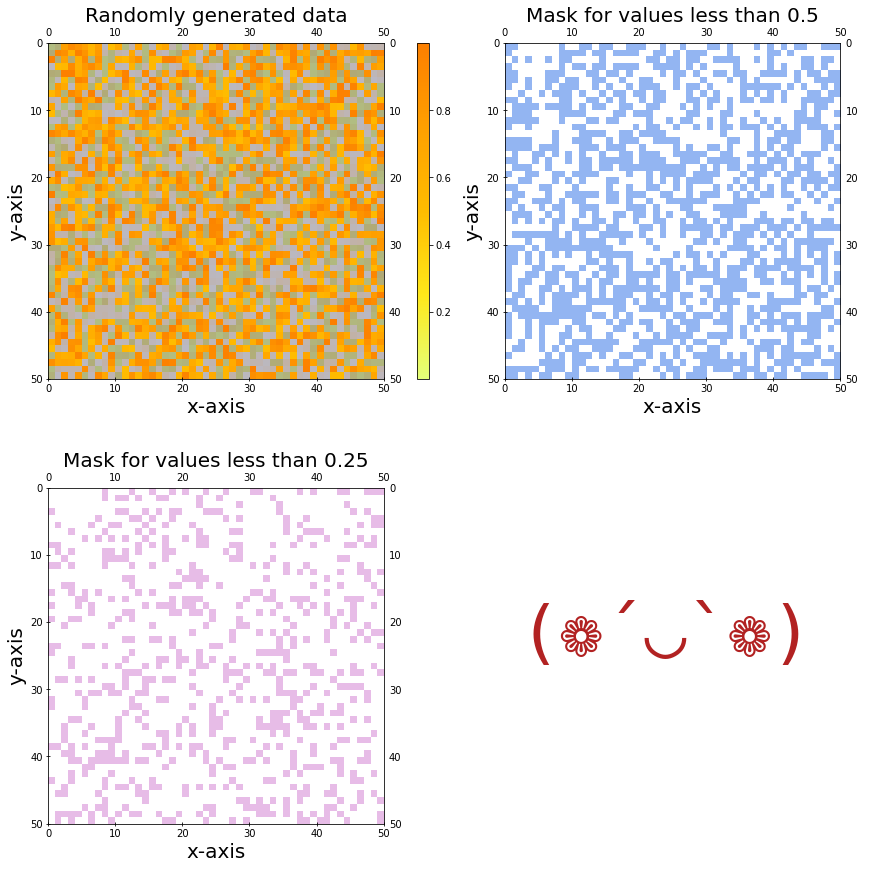

In [21]:
plot_image.last_figure.axes[-1].text(9, .5, '(❁´◡`❁)', fontsize=70, color='firebrick', family='monospace')
plot_image.last_figure